In [5]:
import json
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels

# Processing Data from PostGRES Output

In [30]:
fileprefix = "final_1" # pilot_[1,2,4]
filepath = '../results/{}_results.json'.format(fileprefix)


In [31]:
with open(filepath, 'r') as f:
    all_data = json.load(f)

In [32]:
part_data = {}

count = 0
for participant in all_data['values']:
    count+=1
    print(count, participant[2])
    try:
        part_object = json.loads(participant[17])
        part_object["Beginhit"] = participant[11]
        part_object["Beginexp"] = participant[12]
        part_object["Endhit"] = participant[13]
        part_object["psiturkStatus"] = participant[15]
        part_object["browser"] = participant[5]
        part_object["platform"] = participant[6]
        part_object["language"] = participant[7]

        part_data[part_object["workerId"]] = part_object
        with open('../results/{}_{}.json'.format(fileprefix, part_object['workerId']), 'w') as fw:
            json.dump(part_object, fw)
    except:
        print("Fail")
        continue;

1 613246daa944321e4ac316a2
2 5fa46f1276564b0ee608af0c
3 615d57bec081ba6d5f0d720d
4 6175733727b1e3ce2d72dbe4
5 5eb2e299831ce0092dd2b965
6 616a94b54cf4a5cde4d9c015
7 613bddfaa4471bbe889926ee
8 5e7a54cb26ed710245408b81
9 60e43d16eb3536f1618652fb
10 60143a1a222eb43daf203877
11 5c9cb670b472d0001295f377
12 5f10e8d0f7c9902b10dd0b8c
13 600dc0cb8625143956a3c76a
14 612a6d453bd82d3eb74febe9
15 60fef59b4d85390bc0357a7d
16 5f2dae50cee5310bdd43d160
17 614c58edcb19b4cb3a486666
18 6081e753b16df5194cf90f49
19 6163ea04f307875a076de49c
20 60f5a332d13bb868d7724c52
21 5ed204adcaba6a16440f0efb
22 5974ce5364b35a00019dd811
23 5d88c63e488c06001baae835
24 5f2dc74f1f22490fbef32149
25 615f4115250650ede6f83270
26 926YpEA4CZ57xbt34v4275a2
Fail
27 60f06a479c4f3ec0a536d40a
28 5f2664edcb7a443902254785
29 5c629b836e03a00001d47bdd
30 5f16ccc87d339d0008e08016
31 5e1f2e9726d97425b32bf5ff
32 5dafea4de40355001651fa2f
33 5aa54dca873cda00012cfaf8
34 612f6541543fc09726f9b1d1
35 6131460946d0022f68082db6
36 607eaaad77aa82a7a32b9

In [33]:
part_data.keys()


dict_keys(['613246daa944321e4ac316a2', '5fa46f1276564b0ee608af0c', '615d57bec081ba6d5f0d720d', '6175733727b1e3ce2d72dbe4', '5eb2e299831ce0092dd2b965', '616a94b54cf4a5cde4d9c015', '613bddfaa4471bbe889926ee', '5e7a54cb26ed710245408b81', '60e43d16eb3536f1618652fb', '60143a1a222eb43daf203877', '5c9cb670b472d0001295f377', '5f10e8d0f7c9902b10dd0b8c', '600dc0cb8625143956a3c76a', '612a6d453bd82d3eb74febe9', '60fef59b4d85390bc0357a7d', '5f2dae50cee5310bdd43d160', '614c58edcb19b4cb3a486666', '6081e753b16df5194cf90f49', '6163ea04f307875a076de49c', '60f5a332d13bb868d7724c52', '5ed204adcaba6a16440f0efb', '5974ce5364b35a00019dd811', '5d88c63e488c06001baae835', '5f2dc74f1f22490fbef32149', '615f4115250650ede6f83270', '60f06a479c4f3ec0a536d40a', '5f2664edcb7a443902254785', '5c629b836e03a00001d47bdd', '5f16ccc87d339d0008e08016', '5e1f2e9726d97425b32bf5ff', '5dafea4de40355001651fa2f', '5aa54dca873cda00012cfaf8', '612f6541543fc09726f9b1d1', '6131460946d0022f68082db6', '607eaaad77aa82a7a32b9c74', '60ceaf82

# Analyzing Trial Data

In [34]:
part = part_data['5eb40f1f0d916d20d9db9144']
part["Beginhit"]

KeyError: '5eb40f1f0d916d20d9db9144'

In [98]:
part_stats_dicts = []
for participant in part_data.values():
    try:
        beginhit = datetime.datetime.strptime(participant['Beginhit'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        beginhit = None
    try:
        endhit = datetime.datetime.strptime(participant['Endhit'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        endhit = None
    try:    
        beginexp = datetime.datetime.strptime(participant['Beginexp'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        beginexp = None
    
    try:
        hitLength = (endhit-beginhit).seconds
    except TypeError:
        hitLength = None
    
    try:
        expLength = (endhit-beginexp).seconds
    except TypeError:
        expLength = None
        
    numPracTrials = 0
    trialLengths = []
    trialScores = []
    rewardsWithheld = []
    effort = "-1"
    print(participant['workerId'])
    try:
        firstTrialStamp = participant['data'][0]['dateTime']
        lastTrialStamp = participant['data'][-1]['dateTime']
    except:
        print("No data")
        continue
    if hitLength is None:
        hitLength = (lastTrialStamp - firstTrialStamp) / 1000
    if expLength is None:
        expLength = (lastTrialStamp - firstTrialStamp) / 1000
        
    stroop_timestamps = {
        "1" : {
            "start" : 0,
            "end" : 0,
            "done" : False
        },
        "2" : {
            "start" : 0,
            "end" : 0,
            "done" : False
        }
    }
    mdp_timestamps = {
        "start" : 0,
        "end" : 0,
        "done": False
    }
    current_state = "stroop_1"
    stroop1Completed = 0
    stroop1Correct = 0
    stroop2Completed = 0
    stroop2Correct = 0
    last_trial = participant['data'][0]
    finishHITReached = False
    demographicsAvailable = False
    feedback = ""
    comments = ""
    for idx, trial in enumerate(participant['data']):
        trial_type = trial['trialdata']['trial_type']
        try:
            trial_id = str(trial['trialdata']['trial_id'])
        except KeyError:
            trial_id = ""
        
        if participant['workerId'] == "5eb40f1f0d916d20d9db9144":
            print("{}\t{}\t{}".format(trial_type, trial_id, idx))
        if trial_id == "stroop_1_ready_1" and not stroop_timestamps["1"]["done"]:
            stroop_timestamps["1"]["start"] = trial['dateTime']
            
        if trial_id == "stroop_2_ready_1" and not stroop_timestamps["2"]["done"]:
            stroop_timestamps["2"]["start"] = trial['dateTime']
            
        if trial_id == "finish_distractor_1" and not stroop_timestamps["1"]["done"]:
            stroop_timestamps["1"]["end"] = trial['dateTime']
            stroop_timestamps["1"]["done"] = True
            
        if trial_id == "finish_distractor_2" and not stroop_timestamps["2"]["done"]:
            stroop_timestamps["2"]["end"] = trial['dateTime']
            stroop_timestamps["2"]["done"] = True
            
        if trial_id == "mouselab_instructions_1" and not mdp_timestamps["done"]:
            mdp_timestamps["done"] = True
            mdp_timestamps["start"] = trial['dateTime']
        
        if trial_id.startswith("final_quiz"):
            mdp_timestamps["end"] = trial['dateTime']
            
        if "congruent" in trial_id or "incongruent" in trial_id or "unrelated" in trial_id:
            if not stroop_timestamps["1"]["done"]:
                stroop1Completed += 1
                
                if trial['trialdata']["response"].lower() == trial['trialdata']["correct_response"].lower():
                    stroop1Correct += 1
                
            else:
                stroop2Completed += 1
                if trial['trialdata']["response"].lower() == trial['trialdata']["correct_response"].lower():
                    stroop2Correct += 1
                    
        if trial_type == 'mouselab-mdp':
            if trial_id.startswith('practice'):
                numPracTrials += 1
            else:
                trialLengths.append(trial['trialdata']['trialTime'])
                
                trialScores.append(trial['trialdata']['score'])
                rewardsWithheld.append(trial['trialdata']['withholdReward'])
        if trial_type == 'survey-html-form':
            
            if 'effort' in trial['trialdata']['response']:
                effort = trial['trialdata']['response']['effort']
                demographicsAvailable = True
        if trial_id.startswith("finish_fail"):
            demographicsAvailable = True
        if trial_type == 'survey-text':
            feedback = trial['trialdata']['response']['Q0']
            comments = trial['trialdata']['response']['Q2']
        
        if trial_type == 'html-button-response':
            if "Finish HIT" in trial['trialdata']['stimulus']:
                finishHITReached = True
        last_trial = trial

    dropoutPoint = None
    for obj, type_ in zip([mdp_timestamps, stroop_timestamps["1"], stroop_timestamps["2"]], ["mdp", "s1", "s2"]):
        if obj["start"] > 0 and obj["end"] == 0:
            
            dropoutPoint = type_
            obj["end"] = lastTrialStamp
            
    if not dropoutPoint:
        if len(trialLengths) == 0:
            dropoutPoint = "beginning"
        elif not finishHITReached:
            dropoutPoint = "finishHIT"
            
    if dropoutPoint:
        print(participant['workerId'], dropoutPoint)
    part_stats_dict = {
        "workerId": participant['workerId'],
        "Beginhit": beginhit,
        "Endhit": endhit,
        "Beginexp": beginexp,
        "psiturkStatus" : participant["psiturkStatus"],
        "browser" : participant["browser"],
        "platform" : participant["platform"],
        "language" : participant["language"],
        "hitLength": hitLength,
        "expLength": expLength,
        "totalLengthSum": (lastTrialStamp - firstTrialStamp) / 1000,
        "numQuizAttempts": numPracTrials / 2,
        "trialLengths": trialLengths,
        "trialScores" : trialScores,
        "numTrialsCompleted": len(trialLengths),
        "rewardsWithheld": rewardsWithheld,
        "effort": effort,
        "condition": participant['condition'],
        "stroop1Length" : (stroop_timestamps["1"]["end"] - stroop_timestamps["1"]["start"]) / 1000,
        "stroop2Length" : (stroop_timestamps["2"]["end"] - stroop_timestamps["2"]["start"]) / 1000,
        "mouselabLength" : (mdp_timestamps["end"] - mdp_timestamps["start"]) / 1000,
        "stroop1Completed" : stroop1Completed,
        "stroop2Completed" : stroop2Completed,
        "stroop1Correct" : stroop1Correct,
        "stroop2Correct" : stroop2Correct,
        "dropoutPoint" : dropoutPoint,
        "feedback": feedback,
        "comments": comments,
        "finishHITReached": finishHITReached,
        "demographicsAvailable": demographicsAvailable
    }
    if 'questiondata' in participant and 'final_score' in participant['questiondata']:
        part_stats_dict['finalScore'] = participant['questiondata']['final_score']
    else:
        part_stats_dict['finalScore'] = sum([score for (score, withheld) in zip(trialScores, rewardsWithheld) if not withheld])
    
    part_stats_dict["expLengthSum"] = part_stats_dict["stroop1Length"] + part_stats_dict["mouselabLength"] + part_stats_dict["stroop2Length"]
    part_stats_dict["expLengthDiff"] = part_stats_dict["expLengthSum"] - part_stats_dict["expLength"]
    if len(trialLengths) > 0:
        part_stats_dict["averageTrialLength"] = sum(trialLengths) / len(trialLengths)
        part_stats_dict["propWithheld"] = sum(rewardsWithheld) / len(rewardsWithheld)
        
    part_stats_dicts.append(part_stats_dict)
    

613246daa944321e4ac316a2
613246daa944321e4ac316a2 mdp
5fa46f1276564b0ee608af0c
615d57bec081ba6d5f0d720d
6175733727b1e3ce2d72dbe4
5eb2e299831ce0092dd2b965
616a94b54cf4a5cde4d9c015
616a94b54cf4a5cde4d9c015 mdp
613bddfaa4471bbe889926ee
5e7a54cb26ed710245408b81
5e7a54cb26ed710245408b81 beginning
60e43d16eb3536f1618652fb
60143a1a222eb43daf203877
5c9cb670b472d0001295f377
5f10e8d0f7c9902b10dd0b8c
No data
600dc0cb8625143956a3c76a
612a6d453bd82d3eb74febe9
60fef59b4d85390bc0357a7d
60fef59b4d85390bc0357a7d beginning
5f2dae50cee5310bdd43d160
614c58edcb19b4cb3a486666
614c58edcb19b4cb3a486666 mdp
6081e753b16df5194cf90f49
6163ea04f307875a076de49c
60f5a332d13bb868d7724c52
5ed204adcaba6a16440f0efb
5974ce5364b35a00019dd811
5974ce5364b35a00019dd811 beginning
5d88c63e488c06001baae835
5f2dc74f1f22490fbef32149
5f2dc74f1f22490fbef32149 beginning
615f4115250650ede6f83270
60f06a479c4f3ec0a536d40a
5f2664edcb7a443902254785
5c629b836e03a00001d47bdd
5f16ccc87d339d0008e08016
5f16ccc87d339d0008e08016 s1
5e1f2e9726d9

In [99]:
df_cols = ["workerId", "Beginhit", "hitLength", "expLength", "condition", "stroop1Length", "stroop1Completed", "stroop1Correct", "numQuizAttempts", "numTrialsCompleted", "mouselabLength", "finalScore", "bonus", "stroop2Length","stroop2Completed", "stroop2Correct", "dropoutPoint", "secretCodeReached", "psiturkStatus", "effort", "demographicsAvailable"]

stats_df = pd.DataFrame(part_stats_dicts, columns=df_cols)
print(len(stats_df))
stats_df

50


,workerId,Beginhit,hitLength,expLength,condition,stroop1Length,stroop1Completed,stroop1Correct,numQuizAttempts,numTrialsCompleted,...,finalScore,bonus,stroop2Length,stroop2Completed,stroop2Correct,dropoutPoint,secretCodeReached,psiturkStatus,effort,demographicsAvailable
0,613246daa944321e4ac316a2,2022-09-28 12:33:46.684918,4275.721,4275.721,1,0.000,0,0,3.0,194,...,2427.50,NaN,0.000,0,0,mdp,NaN,6,-1,False
1,5fa46f1276564b0ee608af0c,2022-09-28 12:31:54.651433,2958.000,2951.000,0,957.103,450,412,1.0,30,...,675.00,NaN,1152.694,450,431,None,NaN,3,0,True
2,615d57bec081ba6d5f0d720d,2022-09-28 12:33:29.975818,4156.000,4146.000,0,829.563,450,428,4.0,30,...,288.00,NaN,1065.854,450,448,None,NaN,3,0,True
3,6175733727b1e3ce2d72dbe4,2022-09-28 12:37:26.170236,27256.000,27234.000,1,0.000,0,0,1.0,120,...,510.00,NaN,0.000,0,0,None,NaN,3,1,True
4,5eb2e299831ce0092dd2b965,2022-09-28 12:58:52.685433,3040.000,3033.000,0,872.634,450,430,3.0,30,...,-152.00,NaN,543.329,450,422,None,NaN,3,0,True
5,616a94b54cf4a5cde4d9c015,2022-09-28 12:27:28.753630,580.219,580.219,1,0.000,0,0,3.0,0,...,0.00,NaN,0.000,0,0,mdp,NaN,6,-1,False
6,613bddfaa4471bbe889926ee,2022-09-28 12:32:54.992268,2678.000,2661.000,1,0.000,0,0,1.0,120,...,1205.00,NaN,0.000,0,0,None,NaN,3,1,True
7,5e7a54cb26ed710245408b81,2022-09-28 13:05:55.456151,0.000,0.000,0,0.000,0,0,0.0,0,...,0.00,NaN,0.000,0,0,beginning,NaN,2,-1,False
8,60e43d16eb3536f1618652fb,2022-09-28 13:23:38.570227,2752.000,2712.000,1,0.000,0,0,2.0,120,...,1345.75,NaN,0.000,0,0,None,NaN,3,0,True
9,60143a1a222eb43daf203877,2022-09-28 13:11:51.660420,2200.000,2087.000,0,639.899,450,433,3.0,30,...,1298.00,NaN,576.296,450,431,None,NaN,3,0,True


In [100]:
no_immediate_drops = stats_df.loc[(stats_df.dropoutPoint != "beginning")]
print(len(no_immediate_drops))
no_immediate_drops

45


,workerId,Beginhit,hitLength,expLength,condition,stroop1Length,stroop1Completed,stroop1Correct,numQuizAttempts,numTrialsCompleted,...,finalScore,bonus,stroop2Length,stroop2Completed,stroop2Correct,dropoutPoint,secretCodeReached,psiturkStatus,effort,demographicsAvailable
0,613246daa944321e4ac316a2,2022-09-28 12:33:46.684918,4275.721,4275.721,1,0.000,0,0,3.0,194,...,2427.50,NaN,0.000,0,0,mdp,NaN,6,-1,False
1,5fa46f1276564b0ee608af0c,2022-09-28 12:31:54.651433,2958.000,2951.000,0,957.103,450,412,1.0,30,...,675.00,NaN,1152.694,450,431,None,NaN,3,0,True
2,615d57bec081ba6d5f0d720d,2022-09-28 12:33:29.975818,4156.000,4146.000,0,829.563,450,428,4.0,30,...,288.00,NaN,1065.854,450,448,None,NaN,3,0,True
3,6175733727b1e3ce2d72dbe4,2022-09-28 12:37:26.170236,27256.000,27234.000,1,0.000,0,0,1.0,120,...,510.00,NaN,0.000,0,0,None,NaN,3,1,True
4,5eb2e299831ce0092dd2b965,2022-09-28 12:58:52.685433,3040.000,3033.000,0,872.634,450,430,3.0,30,...,-152.00,NaN,543.329,450,422,None,NaN,3,0,True
5,616a94b54cf4a5cde4d9c015,2022-09-28 12:27:28.753630,580.219,580.219,1,0.000,0,0,3.0,0,...,0.00,NaN,0.000,0,0,mdp,NaN,6,-1,False
6,613bddfaa4471bbe889926ee,2022-09-28 12:32:54.992268,2678.000,2661.000,1,0.000,0,0,1.0,120,...,1205.00,NaN,0.000,0,0,None,NaN,3,1,True
8,60e43d16eb3536f1618652fb,2022-09-28 13:23:38.570227,2752.000,2712.000,1,0.000,0,0,2.0,120,...,1345.75,NaN,0.000,0,0,None,NaN,3,0,True
9,60143a1a222eb43daf203877,2022-09-28 13:11:51.660420,2200.000,2087.000,0,639.899,450,433,3.0,30,...,1298.00,NaN,576.296,450,431,None,NaN,3,0,True
10,5c9cb670b472d0001295f377,2022-09-28 13:04:15.438352,2693.000,2659.000,0,754.762,450,446,1.0,30,...,666.00,NaN,718.655,450,448,None,NaN,3,0,True


In [101]:
# Partial compensation rates

gbp_hourly = 6
secondly_rate = gbp_hourly / (3600)

In [102]:
# Early quitters

early_quitters = no_immediate_drops.loc[(no_immediate_drops.psiturkStatus == 6) & (no_immediate_drops.numQuizAttempts == 0)]
early_quitters.loc[:,'bonus'] = (early_quitters['stroop1Length'] + early_quitters['mouselabLength'] + early_quitters['stroop2Length']) * secondly_rate
print(len(early_quitters))

# Printing bonuses
for idx, row in early_quitters.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))
    
early_quitters

1
6048ed4af6f547ddf5a9fbf7, 0.59


/var/folders/8k/zq6x09px4838xflgn88yhgdw0002cw/T/ipykernel_36734/3352235708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early_quitters.loc[:,'bonus'] = (early_quitters['stroop1Length'] + early_quitters['mouselabLength'] + early_quitters['stroop2Length']) * secondly_rate


,workerId,Beginhit,hitLength,expLength,condition,stroop1Length,stroop1Completed,stroop1Correct,numQuizAttempts,numTrialsCompleted,...,finalScore,bonus,stroop2Length,stroop2Completed,stroop2Correct,dropoutPoint,secretCodeReached,psiturkStatus,effort,demographicsAvailable
43,6048ed4af6f547ddf5a9fbf7,2022-09-28 12:25:25.603673,393.489,393.489,0,353.675,270,254,0.0,0,...,0.0,0.589458,0.0,0,0,s1,NaN,6,-1,False


In [103]:
failed_quiz = no_immediate_drops.loc[(no_immediate_drops.numQuizAttempts > 0) & (no_immediate_drops.numTrialsCompleted == 0)]
failed_quiz.loc[:,'bonus'] = (failed_quiz['stroop1Length'] + failed_quiz['mouselabLength'] + failed_quiz['stroop2Length']) * secondly_rate
print(len(failed_quiz))

# Printing bonuses
for idx, row in failed_quiz.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))
failed_quiz

4
616a94b54cf4a5cde4d9c015, 0.71
614c58edcb19b4cb3a486666, 0.12
5efc4c06d5d77c0008dd1792, 3.52
60ed013b51f6cb78bb82f024, 2.27


/var/folders/8k/zq6x09px4838xflgn88yhgdw0002cw/T/ipykernel_36734/1576330586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failed_quiz.loc[:,'bonus'] = (failed_quiz['stroop1Length'] + failed_quiz['mouselabLength'] + failed_quiz['stroop2Length']) * secondly_rate


,workerId,Beginhit,hitLength,expLength,condition,stroop1Length,stroop1Completed,stroop1Correct,numQuizAttempts,numTrialsCompleted,...,finalScore,bonus,stroop2Length,stroop2Completed,stroop2Correct,dropoutPoint,secretCodeReached,psiturkStatus,effort,demographicsAvailable
5,616a94b54cf4a5cde4d9c015,2022-09-28 12:27:28.753630,580.219,580.219,1,0.000,0,0,3.0,0,...,0.0,0.714723,0.0,0,0,mdp,NaN,6,-1,False
15,614c58edcb19b4cb3a486666,2022-09-28 14:11:04.142165,105.343,105.343,1,0.000,0,0,1.0,0,...,0.0,0.124647,0.0,0,0,mdp,NaN,6,-1,False
36,5efc4c06d5d77c0008dd1792,2022-09-28 12:26:38.494893,2566.000,2560.000,0,1300.041,450,448,4.0,0,...,0.0,3.521563,0.0,0,0,mdp,NaN,3,-1,True
38,60ed013b51f6cb78bb82f024,2022-09-28 12:25:23.996725,1921.777,1921.777,0,945.108,450,445,2.0,0,...,0.0,2.266060,0.0,0,0,mdp,NaN,6,-1,False


In [96]:
for idx, row in failed_quiz.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

616a94b54cf4a5cde4d9c015	1
614c58edcb19b4cb3a486666	1
5efc4c06d5d77c0008dd1792	0
60ed013b51f6cb78bb82f024	0


In [108]:
eligible = no_immediate_drops.loc[(~no_immediate_drops['workerId'].isin(early_quitters.workerId)) & (~no_immediate_drops['workerId'].isin(failed_quiz.workerId))]
print(len(eligible))
eligible

40


,workerId,Beginhit,hitLength,expLength,condition,stroop1Length,stroop1Completed,stroop1Correct,numQuizAttempts,numTrialsCompleted,...,finalScore,bonus,stroop2Length,stroop2Completed,stroop2Correct,dropoutPoint,secretCodeReached,psiturkStatus,effort,demographicsAvailable
0,613246daa944321e4ac316a2,2022-09-28 12:33:46.684918,4275.721,4275.721,1,0.000,0,0,3.0,194,...,2427.50,NaN,0.000,0,0,mdp,NaN,6,-1,False
1,5fa46f1276564b0ee608af0c,2022-09-28 12:31:54.651433,2958.000,2951.000,0,957.103,450,412,1.0,30,...,675.00,NaN,1152.694,450,431,None,NaN,3,0,True
2,615d57bec081ba6d5f0d720d,2022-09-28 12:33:29.975818,4156.000,4146.000,0,829.563,450,428,4.0,30,...,288.00,NaN,1065.854,450,448,None,NaN,3,0,True
3,6175733727b1e3ce2d72dbe4,2022-09-28 12:37:26.170236,27256.000,27234.000,1,0.000,0,0,1.0,120,...,510.00,NaN,0.000,0,0,None,NaN,3,1,True
4,5eb2e299831ce0092dd2b965,2022-09-28 12:58:52.685433,3040.000,3033.000,0,872.634,450,430,3.0,30,...,-152.00,NaN,543.329,450,422,None,NaN,3,0,True
6,613bddfaa4471bbe889926ee,2022-09-28 12:32:54.992268,2678.000,2661.000,1,0.000,0,0,1.0,120,...,1205.00,NaN,0.000,0,0,None,NaN,3,1,True
8,60e43d16eb3536f1618652fb,2022-09-28 13:23:38.570227,2752.000,2712.000,1,0.000,0,0,2.0,120,...,1345.75,NaN,0.000,0,0,None,NaN,3,0,True
9,60143a1a222eb43daf203877,2022-09-28 13:11:51.660420,2200.000,2087.000,0,639.899,450,433,3.0,30,...,1298.00,NaN,576.296,450,431,None,NaN,3,0,True
10,5c9cb670b472d0001295f377,2022-09-28 13:04:15.438352,2693.000,2659.000,0,754.762,450,446,1.0,30,...,666.00,NaN,718.655,450,448,None,NaN,3,0,True
11,600dc0cb8625143956a3c76a,2022-09-28 12:29:58.740395,2472.000,2454.000,1,0.000,0,0,1.0,120,...,1369.25,NaN,0.000,0,0,None,NaN,3,0,True


In [105]:
incomplete_data = eligible.loc[(eligible.psiturkStatus != 3)]
print(len(incomplete_data))
incomplete_data

4


,workerId,Beginhit,hitLength,expLength,condition,stroop1Length,stroop1Completed,stroop1Correct,numQuizAttempts,numTrialsCompleted,mouselabLength,finalScore,bonus,stroop2Length,stroop2Completed,stroop2Correct,dropoutPoint,secretCodeReached,psiturkStatus,effort
0,613246daa944321e4ac316a2,2022-09-28 12:33:46.684918,4275.721,4275.721,1,0.000,0,0,3.0,194,3826.320,2427.5,2.000000,0.0,0,0,mdp,NaN,6,-1
27,5f16ccc87d339d0008e08016,2022-09-28 12:34:19.334075,826.519,826.519,0,696.234,434,433,0.0,0,0.000,0.0,0.000000,0.0,0,0,s1,NaN,2,-1
31,6131460946d0022f68082db6,2022-09-28 12:38:54.943144,1809.623,1809.623,1,0.000,0,0,1.0,67,1493.907,839.5,0.691658,0.0,0,0,mdp,NaN,2,-1
34,5d8aa1e3eab19600163d9ab7,2022-09-28 12:30:27.604118,2372.265,2372.265,0,849.424,450,425,2.0,30,727.096,92.0,0.135793,561.6,327,311,s2,NaN,2,-1


In [104]:
for idx, row in incomplete_data.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

613246daa944321e4ac316a2	1
5f16ccc87d339d0008e08016	0
6131460946d0022f68082db6	1
5d8aa1e3eab19600163d9ab7	0


In [87]:
incomplete_full_compensation_eligible = ["5d8aa1e3eab19600163d9ab7"]
incomplete_partial_compensation_eligible = ["5f16ccc87d339d0008e08016", "6131460946d0022f68082db6"]

In [89]:
incomplete_partial = eligible.loc[(eligible.workerId.isin(incomplete_partial_compensation_eligible))]
incomplete_partial.loc[:,'bonus'] = (incomplete_partial['stroop1Length'] + incomplete_partial['mouselabLength'] + incomplete_partial['stroop2Length']) * secondly_rate
print(len(incomplete_partial))

# Printing bonuses
for idx, row in incomplete_partial.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))
incomplete_partial

2
5f16ccc87d339d0008e08016, 1.16
6131460946d0022f68082db6, 2.49


/var/folders/8k/zq6x09px4838xflgn88yhgdw0002cw/T/ipykernel_36734/3363054834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_partial.loc[:,'bonus'] = (incomplete_partial['stroop1Length'] + incomplete_partial['mouselabLength'] + incomplete_partial['stroop2Length']) * secondly_rate


,workerId,Beginhit,hitLength,expLength,condition,stroop1Length,stroop1Completed,stroop1Correct,numQuizAttempts,numTrialsCompleted,mouselabLength,finalScore,bonus,stroop2Length,stroop2Completed,stroop2Correct,dropoutPoint,secretCodeReached,psiturkStatus,effort
27,5f16ccc87d339d0008e08016,2022-09-28 12:34:19.334075,826.519,826.519,0,696.234,434,433,0.0,0,0.000,0.0,1.160390,0.0,0,0,s1,NaN,2,-1
31,6131460946d0022f68082db6,2022-09-28 12:38:54.943144,1809.623,1809.623,1,0.000,0,0,1.0,67,1493.907,839.5,2.489845,0.0,0,0,mdp,NaN,2,-1


In [109]:
complete_data = eligible.loc[(eligible.psiturkStatus == 3)]
print(len(complete_data.loc[complete_data.condition == 0]))
print(len(complete_data.loc[complete_data.condition == 1]))
complete_data

17
19


,workerId,Beginhit,hitLength,expLength,condition,stroop1Length,stroop1Completed,stroop1Correct,numQuizAttempts,numTrialsCompleted,...,finalScore,bonus,stroop2Length,stroop2Completed,stroop2Correct,dropoutPoint,secretCodeReached,psiturkStatus,effort,demographicsAvailable
1,5fa46f1276564b0ee608af0c,2022-09-28 12:31:54.651433,2958.0,2951.0,0,957.103,450,412,1.0,30,...,675.00,NaN,1152.694,450,431,None,NaN,3,0,True
2,615d57bec081ba6d5f0d720d,2022-09-28 12:33:29.975818,4156.0,4146.0,0,829.563,450,428,4.0,30,...,288.00,NaN,1065.854,450,448,None,NaN,3,0,True
3,6175733727b1e3ce2d72dbe4,2022-09-28 12:37:26.170236,27256.0,27234.0,1,0.000,0,0,1.0,120,...,510.00,NaN,0.000,0,0,None,NaN,3,1,True
4,5eb2e299831ce0092dd2b965,2022-09-28 12:58:52.685433,3040.0,3033.0,0,872.634,450,430,3.0,30,...,-152.00,NaN,543.329,450,422,None,NaN,3,0,True
6,613bddfaa4471bbe889926ee,2022-09-28 12:32:54.992268,2678.0,2661.0,1,0.000,0,0,1.0,120,...,1205.00,NaN,0.000,0,0,None,NaN,3,1,True
8,60e43d16eb3536f1618652fb,2022-09-28 13:23:38.570227,2752.0,2712.0,1,0.000,0,0,2.0,120,...,1345.75,NaN,0.000,0,0,None,NaN,3,0,True
9,60143a1a222eb43daf203877,2022-09-28 13:11:51.660420,2200.0,2087.0,0,639.899,450,433,3.0,30,...,1298.00,NaN,576.296,450,431,None,NaN,3,0,True
10,5c9cb670b472d0001295f377,2022-09-28 13:04:15.438352,2693.0,2659.0,0,754.762,450,446,1.0,30,...,666.00,NaN,718.655,450,448,None,NaN,3,0,True
11,600dc0cb8625143956a3c76a,2022-09-28 12:29:58.740395,2472.0,2454.0,1,0.000,0,0,1.0,120,...,1369.25,NaN,0.000,0,0,None,NaN,3,0,True
12,612a6d453bd82d3eb74febe9,2022-09-28 12:37:41.189430,2520.0,2514.0,0,671.827,450,438,1.0,30,...,841.00,NaN,723.625,450,442,None,NaN,3,0,True


In [106]:
for idx, row in complete_data.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

5fa46f1276564b0ee608af0c	0
615d57bec081ba6d5f0d720d	0
6175733727b1e3ce2d72dbe4	1
5eb2e299831ce0092dd2b965	0
613bddfaa4471bbe889926ee	1
60e43d16eb3536f1618652fb	1
60143a1a222eb43daf203877	0
5c9cb670b472d0001295f377	0
600dc0cb8625143956a3c76a	1
612a6d453bd82d3eb74febe9	0
5f2dae50cee5310bdd43d160	0
6081e753b16df5194cf90f49	1
6163ea04f307875a076de49c	1
60f5a332d13bb868d7724c52	1
5ed204adcaba6a16440f0efb	1
5d88c63e488c06001baae835	1
615f4115250650ede6f83270	1
60f06a479c4f3ec0a536d40a	0
5f2664edcb7a443902254785	1
5c629b836e03a00001d47bdd	0
5e1f2e9726d97425b32bf5ff	0
5dafea4de40355001651fa2f	1
612f6541543fc09726f9b1d1	1
607eaaad77aa82a7a32b9c74	0
61445c984906c1189b057dea	1
60fe8586944a3f20fd5e8db2	1
5ffdf54a500d7740e02f3639	1
60e30e4e37884055cdbfbf39	0
6320b0f0782ad75ec20759ea	1
5eb90e71fdb7eb00095c2c88	1
611cccc7df12bfa05e6135e0	0
6165d04961f94aba783d4529	0
631a24dfca851aac1863e4a4	1
5fca5e05aae247651ac78dfe	0
5d21e78e5a2cea0016a843c4	0
6163d356472f53c054893857	0


In [92]:
full_bonus_eligible = pd.concat([complete_data, eligible.loc[eligible.workerId.isin(incomplete_full_compensation_eligible)]])

full_bonus_eligible

,workerId,Beginhit,hitLength,expLength,condition,stroop1Length,stroop1Completed,stroop1Correct,numQuizAttempts,numTrialsCompleted,finalScore,bonus,stroop2Completed,stroop2Correct,dropoutPoint,secretCodeReached,psiturkStatus,effort,mouselabLength,stroop2Length
1,5fa46f1276564b0ee608af0c,2022-09-28 12:31:54.651433,2958.000,2951.000,0,957.103,450,412,1.0,30,675.00,0.996310,450,431,None,NaN,3,0,NaN,NaN
2,615d57bec081ba6d5f0d720d,2022-09-28 12:33:29.975818,4156.000,4146.000,0,829.563,450,428,4.0,30,288.00,0.425092,450,448,None,NaN,3,0,NaN,NaN
3,6175733727b1e3ce2d72dbe4,2022-09-28 12:37:26.170236,27256.000,27234.000,1,0.000,0,0,1.0,120,510.00,0.420185,0,0,None,NaN,3,1,NaN,NaN
4,5eb2e299831ce0092dd2b965,2022-09-28 12:58:52.685433,3040.000,3033.000,0,872.634,450,430,3.0,30,-152.00,-0.224354,450,422,None,NaN,3,0,NaN,NaN
6,613bddfaa4471bbe889926ee,2022-09-28 12:32:54.992268,2678.000,2661.000,1,0.000,0,0,1.0,120,1205.00,0.992791,0,0,None,NaN,3,1,NaN,NaN
8,60e43d16eb3536f1618652fb,2022-09-28 13:23:38.570227,2752.000,2712.000,1,0.000,0,0,2.0,120,1345.75,1.108754,0,0,None,NaN,3,0,NaN,NaN
9,60143a1a222eb43daf203877,2022-09-28 13:11:51.660420,2200.000,2087.000,0,639.899,450,433,3.0,30,1298.00,1.915867,450,431,None,NaN,3,0,NaN,NaN
10,5c9cb670b472d0001295f377,2022-09-28 13:04:15.438352,2693.000,2659.000,0,754.762,450,446,1.0,30,666.00,0.983026,450,448,None,NaN,3,0,NaN,NaN
11,600dc0cb8625143956a3c76a,2022-09-28 12:29:58.740395,2472.000,2454.000,1,0.000,0,0,1.0,120,1369.25,1.128115,0,0,None,NaN,3,0,NaN,NaN
12,612a6d453bd82d3eb74febe9,2022-09-28 12:37:41.189430,2520.000,2514.000,0,671.827,450,438,1.0,30,841.00,1.241328,450,442,None,NaN,3,0,NaN,NaN


In [93]:
# Calculating the bonus conversion rate for each condition

max_bonus = 2.0

bonus_calc_cols = ["condition", "finalScore"]

bonus_rate = {}

for condition in np.unique(full_bonus_eligible.condition):
    bonus_rate[condition] = max_bonus / full_bonus_eligible.loc[full_bonus_eligible.condition == condition].finalScore.max()

# stats_df_filtered = stats_df.loc[stats_df['numTrialsCompleted'] > 0]

bonuses = []
# Adding the bonus for each participant
for idx, row in full_bonus_eligible.iterrows():
    bonuses.append(bonus_rate[row['condition']] * row['finalScore'])

full_bonus_eligible['bonus'] = bonuses
full_bonus_eligible

,workerId,Beginhit,hitLength,expLength,condition,stroop1Length,stroop1Completed,stroop1Correct,numQuizAttempts,numTrialsCompleted,finalScore,bonus,stroop2Completed,stroop2Correct,dropoutPoint,secretCodeReached,psiturkStatus,effort,mouselabLength,stroop2Length
1,5fa46f1276564b0ee608af0c,2022-09-28 12:31:54.651433,2958.000,2951.000,0,957.103,450,412,1.0,30,675.00,0.996310,450,431,None,NaN,3,0,NaN,NaN
2,615d57bec081ba6d5f0d720d,2022-09-28 12:33:29.975818,4156.000,4146.000,0,829.563,450,428,4.0,30,288.00,0.425092,450,448,None,NaN,3,0,NaN,NaN
3,6175733727b1e3ce2d72dbe4,2022-09-28 12:37:26.170236,27256.000,27234.000,1,0.000,0,0,1.0,120,510.00,0.730921,0,0,None,NaN,3,1,NaN,NaN
4,5eb2e299831ce0092dd2b965,2022-09-28 12:58:52.685433,3040.000,3033.000,0,872.634,450,430,3.0,30,-152.00,-0.224354,450,422,None,NaN,3,0,NaN,NaN
6,613bddfaa4471bbe889926ee,2022-09-28 12:32:54.992268,2678.000,2661.000,1,0.000,0,0,1.0,120,1205.00,1.726980,0,0,None,NaN,3,1,NaN,NaN
8,60e43d16eb3536f1618652fb,2022-09-28 13:23:38.570227,2752.000,2712.000,1,0.000,0,0,2.0,120,1345.75,1.928699,0,0,None,NaN,3,0,NaN,NaN
9,60143a1a222eb43daf203877,2022-09-28 13:11:51.660420,2200.000,2087.000,0,639.899,450,433,3.0,30,1298.00,1.915867,450,431,None,NaN,3,0,NaN,NaN
10,5c9cb670b472d0001295f377,2022-09-28 13:04:15.438352,2693.000,2659.000,0,754.762,450,446,1.0,30,666.00,0.983026,450,448,None,NaN,3,0,NaN,NaN
11,600dc0cb8625143956a3c76a,2022-09-28 12:29:58.740395,2472.000,2454.000,1,0.000,0,0,1.0,120,1369.25,1.962379,0,0,None,NaN,3,0,NaN,NaN
12,612a6d453bd82d3eb74febe9,2022-09-28 12:37:41.189430,2520.000,2514.000,0,671.827,450,438,1.0,30,841.00,1.241328,450,442,None,NaN,3,0,NaN,NaN


In [95]:
# Printing bonuses

for idx, row in full_bonus_eligible.iterrows():
    if(row['bonus'] > 0):
        print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))

5fa46f1276564b0ee608af0c, 1.00
615d57bec081ba6d5f0d720d, 0.43
6175733727b1e3ce2d72dbe4, 0.73
613bddfaa4471bbe889926ee, 1.73
60e43d16eb3536f1618652fb, 1.93
60143a1a222eb43daf203877, 1.92
5c9cb670b472d0001295f377, 0.98
600dc0cb8625143956a3c76a, 1.96
612a6d453bd82d3eb74febe9, 1.24
5f2dae50cee5310bdd43d160, 1.43
6081e753b16df5194cf90f49, 1.80
6163ea04f307875a076de49c, 0.45
60f5a332d13bb868d7724c52, 1.80
5ed204adcaba6a16440f0efb, 1.88
5d88c63e488c06001baae835, 1.58
615f4115250650ede6f83270, 1.29
60f06a479c4f3ec0a536d40a, 1.49
5f2664edcb7a443902254785, 0.48
5c629b836e03a00001d47bdd, 0.55
5e1f2e9726d97425b32bf5ff, 1.89
5dafea4de40355001651fa2f, 0.86
612f6541543fc09726f9b1d1, 1.63
607eaaad77aa82a7a32b9c74, 1.52
61445c984906c1189b057dea, 1.80
60fe8586944a3f20fd5e8db2, 0.75
5ffdf54a500d7740e02f3639, 1.72
60e30e4e37884055cdbfbf39, 1.26
6320b0f0782ad75ec20759ea, 1.48
5eb90e71fdb7eb00095c2c88, 2.00
611cccc7df12bfa05e6135e0, 1.75
6165d04961f94aba783d4529, 0.05
631a24dfca851aac1863e4a4, 1.85
5fca5e05

In [31]:
df_cols = ["workerId", "condition", "numQuizAttempts", "numTrialsCompleted", "propWithheld", "finalScore", "bonus","averageTrialLength", "mouselabLength", "dropoutPoint", "secretCodeReached", "psiturkStatus", "browser", "platform", "language", "effort"]

stats_df = pd.DataFrame(part_stats_dicts, columns=df_cols)
stats_df.loc[stats_df.condition == 0]

,workerId,condition,numQuizAttempts,numTrialsCompleted,propWithheld,finalScore,bonus,averageTrialLength,mouselabLength,dropoutPoint,secretCodeReached,psiturkStatus,browser,platform,language,effort
0,5eb40f1f0d916d20d9db9144,0,2.0,30,0.0,1439.0,2.000000,12073.333333,1000.231,s2,NaN,2,chrome,windows,es-ES,-1
6,5c430039e972300001ac04f3,0,1.0,30,0.0,1088.0,1.512161,17229.266667,716.154,None,NaN,3,firefox,macos,pl,0
7,6169dc7d34d85e70201ee321,0,1.0,30,0.0,1190.0,1.653926,24655.833333,1089.459,None,NaN,3,chrome,windows,en-US,0
8,61670b85f91be7f7618712b5,0,0.0,0,NaN,0.0,0.000000,NaN,0.000,s1,NaN,2,chrome,windows,en-US,-1
9,5d1cc0603690a90017b7fde9,0,1.0,30,0.0,1367.0,1.899931,10578.233333,387.307,None,NaN,3,chrome,windows,pl-PL,0
14,5db99138bcd46f000ed93841,0,2.0,30,0.0,1170.0,1.626129,13723.100000,864.681,None,NaN,3,chrome,windows,it-IT,0
15,60b8b5dcb46db8ae98d0b047,0,4.0,30,0.0,1061.0,1.474635,10791.900000,1304.215,None,NaN,3,chrome,windows,pt-PT,0
16,6130ceb2390f7cb3284f33a9,0,1.0,30,0.0,938.0,1.303683,15535.200000,732.688,s2,NaN,2,chrome,windows,en-GB,-1
17,615f371e6688c87e53e7acf5,0,3.0,30,0.0,1212.0,1.684503,22162.633333,1385.640,None,NaN,3,chrome,windows,en-US,1
18,6140be2fdc5e6f433f412f7a,0,1.0,30,0.0,1240.0,1.723419,15516.866667,900.567,None,NaN,3,chrome,windows,en-US,0


In [10]:
# Analyzing dropouts

relevant_cols = ["workerId", "condition", "hitLength", "stroop1Length", "stroop1Completed", "numQuizAttempts", "numTrialsCompleted", "propWithheld", "finalScore", "bonus","averageTrialLength", "mouselabLength", "stroop2Length", "stroop2Completed", "dropoutPoint", "psiturkStatus", "effort"]
platform_cols = ["workerId", "condition","Beginhit", "browser", "platform", "language","dropoutPoint"]

platform_df = pd.DataFrame(part_stats_dicts, columns=platform_cols)
platform_df.loc[platform_df.condition == 0]

,workerId,condition,Beginhit,browser,platform,language,dropoutPoint
0,5eb40f1f0d916d20d9db9144,0,2022-08-19 17:09:00.819288,chrome,windows,es-ES,s2
6,5c430039e972300001ac04f3,0,2022-08-19 16:28:40.541747,firefox,macos,pl,None
7,6169dc7d34d85e70201ee321,0,2022-08-19 16:33:14.477679,chrome,windows,en-US,None
8,61670b85f91be7f7618712b5,0,2022-08-19 16:52:05.365106,chrome,windows,en-US,s1
9,5d1cc0603690a90017b7fde9,0,2022-08-19 17:05:44.304353,chrome,windows,pl-PL,None
14,5db99138bcd46f000ed93841,0,2022-08-19 16:30:39.651162,chrome,windows,it-IT,None
15,60b8b5dcb46db8ae98d0b047,0,2022-08-19 17:03:47.092529,chrome,windows,pt-PT,None
16,6130ceb2390f7cb3284f33a9,0,2022-08-19 16:30:49.764071,chrome,windows,en-GB,s2
17,615f371e6688c87e53e7acf5,0,2022-08-19 16:55:24.676090,chrome,windows,en-US,None
18,6140be2fdc5e6f433f412f7a,0,2022-08-19 16:30:16.767967,chrome,windows,en-US,None


In [10]:
# Condition 2

cond_2_filtered = stats_df.loc[stats_df.condition==2]
relevant_cols = ["workerId", "hitLength", "expLength", "expLengthSum", "totalLengthSum", "expLengthDiff", "numQuizAttempts", "numTrialsCompleted", "propWithheld", "finalScore", "bonus","averageTrialLength", "mouselabLength", "dropoutPoint", "effort"]
cond_2_filtered = cond_2_filtered[relevant_cols].loc[cond_2_filtered.numTrialsCompleted > 0]
cond_2_filtered

,workerId,hitLength,expLength,expLengthSum,totalLengthSum,expLengthDiff,numQuizAttempts,numTrialsCompleted,propWithheld,finalScore,bonus,averageTrialLength,mouselabLength,dropoutPoint,effort
44,612288702a5316519e4e9602,3044.000,3035.000,2705.362,3034.269,-329.638,1.0,120,0.750000,1261.25,1.713946,18104.666667,2705.362,None,0
45,5e1aed4331d8d93320bc6d4e,3619.000,3614.000,1653.194,3609.015,-1960.806,1.0,120,0.750000,1382.50,1.878716,12394.975000,1653.194,None,1
46,6137dafbe514b520301ed443,2113.000,2104.000,1813.157,2103.441,-290.843,1.0,120,0.750000,1471.75,2.000000,12270.300000,1813.157,None,1
47,614775c6f329a9e5ab190e04,2110.000,2033.000,1760.290,2033.640,-272.710,2.0,120,0.750000,832.25,1.130967,11488.458333,1760.290,None,1
48,616f469494656434f5b4ebc6,4851.000,4739.000,3699.465,4738.730,-1039.535,3.0,120,0.750000,1165.75,1.584169,19891.341667,3699.465,None,0
49,5f5a69a0b2b7c2119ecf07bf,2428.000,2420.000,2064.476,2419.892,-355.524,2.0,120,0.750000,1335.75,1.815186,11761.966667,2064.476,None,0
51,60315645c8c7420a2f1ade9c,4867.000,4836.000,4138.013,4833.866,-697.987,1.0,120,0.750000,872.50,1.185663,28034.441667,4138.013,None,0
52,5ec6583644972a0315eb4f0d,2565.000,2554.000,2236.166,2554.326,-317.834,2.0,120,0.750000,1396.00,1.897061,12309.108333,2236.166,None,0
53,6141210c31f06c30f5f58104,2857.000,2841.000,2388.503,2839.268,-452.497,2.0,120,0.750000,647.50,0.879905,14658.358333,2388.503,None,0
54,5f58d87950e39f07ad1ba367,2745.883,2745.883,2470.680,2745.883,-275.203,4.0,93,0.731183,1077.25,1.463904,15465.978495,2470.680,mdp,-1


In [11]:
# Condition 2 average times:

print("\nExperiment Length (from timestamps):")
print(cond_2_filtered.totalLengthSum.mean() / 60)
print(cond_2_filtered.totalLengthSum.std() / 60)

print("\nExperiment Length (from PsiTurk):")
print(cond_2_filtered.expLength.mean() / 60)
print(cond_2_filtered.expLength.std() / 60)

print("\nMouselab Length")
print(cond_2_filtered.expLengthSum.mean() / 60)
print(cond_2_filtered.expLengthSum.std() / 60)


Experiment Length (from timestamps):
47.087942857142856
15.007061149788393

Experiment Length (from PsiTurk):
47.13219920634921
15.016911508108002

Mouselab Length
39.4709873015873
13.104396161425399


In [11]:
# Condition 0

stats_df_filtered = stats_df.loc[stats_df.condition == 0].loc[stats_df.numTrialsCompleted > 0]

no_dropouts = stats_df_filtered.loc[stats_df_filtered.dropoutPoint.isnull()]

dropouts = stats_df_filtered.loc[stats_df_filtered.dropoutPoint.notnull()]

In [12]:
dropouts

,workerId,condition,hitLength,expLength,expLengthSum,expLengthDiff,totalLengthSum,stroop1Length,stroop1Completed,stroop1Correct,...,mouselabLength,stroop2Length,stroop2Completed,stroop2Correct,dropoutPoint,psiturkStatus,browser,platform,language,effort
0,5eb40f1f0d916d20d9db9144,0,2341.545,2341.545,1998.186,-343.359,2341.545,757.299,450,437,...,1000.231,240.656,159,150,s2,2,chrome,windows,es-ES,-1
16,6130ceb2390f7cb3284f33a9,0,2156.434,2156.434,1858.493,-297.941,2156.434,675.466,450,439,...,732.688,450.339,322,306,s2,2,chrome,windows,en-GB,-1
25,615df4407595b67e50cf886b,0,2415.113,2415.113,2136.598,-278.515,2415.113,794.439,450,441,...,985.318,356.841,221,220,s2,2,chrome,windows,en-ZA,-1
33,5c86b96a34daa70017e9341f,0,2243.474,2243.474,1970.626,-272.848,2243.474,622.037,450,441,...,855.609,492.980,437,431,s2,2,firefox,windows,en-US,-1
38,6133e1b6a8093fd7526e0eda,0,1486.514,1486.514,1323.191,-163.323,1486.514,645.521,450,443,...,466.223,211.447,187,185,s2,2,chrome,windows,fr-FR,-1
39,615e83303bf461137c0fc627,0,2803.456,2803.456,2538.054,-265.402,2803.456,918.989,450,438,...,1365.698,253.367,180,165,s2,6,chrome,windows,es-US,-1


In [14]:
print("\nCondition 0, No Dropouts: {}".format(len(no_dropouts)))
print("\nHIT:")
print(no_dropouts.hitLength.mean() / 60)
print(no_dropouts.hitLength.std() / 60)
print("\nExperiment (from PsiTurk):")
print(no_dropouts.totalLengthSum.mean() / 60)
print(no_dropouts.totalLengthSum.std() / 60)
print("\nExperiment (from timestamps):")
print(no_dropouts.totalLengthSum.mean() / 60)
print(no_dropouts.totalLengthSum.std() / 60)
print("\nExperiment (from individual sums):")
print(no_dropouts.expLengthSum.mean() / 60)
print(no_dropouts.expLengthSum.std() / 60)
print('\nStroop 1:')
print(no_dropouts.stroop1Length.mean() / 60)
print(no_dropouts.stroop1Length.std() / 60)
print('\nMDP:')
print(no_dropouts.mouselabLength.mean() / 60)
print(no_dropouts.mouselabLength.std() / 60)
print('\nStroop 2:')
print(no_dropouts.stroop2Length.mean() / 60)
print(no_dropouts.stroop2Length.std() / 60)

print("\nCondition 0, Dropouts: {}".format(len(dropouts)))
print("\nHIT:")
print(dropouts.hitLength.mean() / 60)
print(dropouts.hitLength.std() / 60)
print("\nExperiment Sum:")
print(dropouts.expLengthSum.mean() / 60)
print(dropouts.expLengthSum.std() / 60)
print("\nExperiment:")
print(dropouts.expLength.mean() / 60)
print(dropouts.expLength.std() / 60)
print('\nStroop 1:')
print(dropouts.stroop1Length.mean() / 60)
print(dropouts.stroop1Length.std() / 60)
print('\nMDP:')
print(dropouts.mouselabLength.mean() / 60)
print(dropouts.mouselabLength.std() / 60)
print('\nStroop 2:')
print(dropouts.stroop2Length.mean() / 60)
print(dropouts.stroop2Length.std() / 60)
print('\nStroop 2 Completed:')
print(dropouts.stroop2Completed.mean())
print(dropouts.stroop2Completed.std())

print("\nCondition 0, All: {}".format(len(stats_df_filtered)))


Condition 0, No Dropouts: 16

HIT:
48.0125
14.327872990937783

Experiment (from PsiTurk):
47.461908333333334
14.144999653040594

Experiment (from timestamps):
47.461908333333334
14.144999653040594

Experiment (from individual sums):
39.03831770833334
9.243863192060768

Stroop 1:
12.793671875
3.751139054512093

MDP:
13.270736458333333
4.51988727298066

Stroop 2:
12.973909375000002
5.174664201107262

Condition 0, Dropouts: 6

HIT:
37.35148888888889
7.200262306469325

Experiment Sum:
32.847633333333334
6.591351065086902

Experiment:
37.35148888888889
7.200262306469325

Stroop 1:
12.260419444444445
1.85878208645747

MDP:
15.016019444444444
5.012877032618834

Stroop 2:
5.571194444444444
1.9658853337665751

Stroop 2 Completed:
251.0
107.83134980143761

Condition 0, All: 22


In [15]:
# Condition 1

stats_df_filtered_2 = stats_df.loc[stats_df.condition == 1].loc[stats_df.numTrialsCompleted > 0]

no_dropouts_2 = stats_df_filtered_2.loc[stats_df_filtered_2.dropoutPoint.isnull()]

dropouts_2 = stats_df_filtered_2.loc[stats_df_filtered_2.dropoutPoint.notnull()]

In [16]:
dropouts_2

,workerId,condition,hitLength,expLength,expLengthSum,expLengthDiff,totalLengthSum,stroop1Length,stroop1Completed,stroop1Correct,...,propWithheld,finalScore,bonus,averageTrialLength,mouselabLength,stroop2Length,stroop2Completed,stroop2Correct,dropoutPoint,effort
2,5e8a0912524dca6ad71ecb86,1,3518.669,3518.669,1289.396,-2229.273,3518.669,0.0,0,0,...,0.675676,592.75,0.770556,24278.756757,1289.396,0.0,0,0,mdp,-1


In [17]:

print("\nCondition 1, No Dropouts: {}".format(len(no_dropouts)))
print("\nHIT:")
print(no_dropouts_2.hitLength.mean() / 60)
print(no_dropouts_2.hitLength.std() / 60)
print("\nExperiment (from timestamps):")
print(no_dropouts_2.totalLengthSum.mean() / 60)
print(no_dropouts_2.totalLengthSum.std() / 60)
print("\nExperiment (from individual sums):")
print(no_dropouts_2.expLengthSum.mean() / 60)
print(no_dropouts_2.expLengthSum.std() / 60)
print('\nStroop 1:')
print(no_dropouts_2.stroop1Length.mean() / 60)
print(no_dropouts_2.stroop1Length.std() / 60)
print('\nMDP:')
print(no_dropouts_2.mouselabLength.mean() / 60)
print(no_dropouts_2.mouselabLength.std() / 60)
print('\nStroop 2:')
print(no_dropouts_2.stroop2Length.mean() / 60)
print(no_dropouts_2.stroop2Length.std() / 60)

print("\nCondition 1, Dropouts:: {}".format(len(dropouts)))
print("\nHIT:")
print(dropouts_2.hitLength.mean() / 60)
print(dropouts_2.hitLength.std() / 60)
print("\nExperiment:")
print(dropouts_2.expLengthSum.mean() / 60)
print(dropouts_2.expLengthSum.std() / 60)
print('\nStroop 1:')
print(dropouts_2.stroop1Length.mean() / 60)
print(dropouts_2.stroop1Length.std() / 60)
print('\nMDP:')
print(dropouts_2.mouselabLength.mean() / 60)
print(dropouts_2.mouselabLength.std() / 60)
print('\nStroop 2:')
print(dropouts_2.stroop2Length.mean() / 60)
print(dropouts_2.stroop2Length.std() / 60)


Condition 1, No Dropouts: 16

HIT:
41.21584444444444
15.995064535844177

Experiment (from timestamps):
40.355688888888885
14.835255766043108

Experiment (from individual sums):
35.507555555555555
13.51193961938123

Stroop 1:
0.0
0.0

MDP:
35.507555555555555
13.51193961938123

Stroop 2:
0.0
0.0

Condition 1, Dropouts:: 6

HIT:
58.64448333333333
nan

Experiment:
21.489933333333333
nan

Stroop 1:
0.0
nan

MDP:
21.489933333333333
nan

Stroop 2:
0.0
nan


In [16]:
# Average stats

stats_df_filtered = stats_df.loc[stats_df.dropoutPoint.isnull()]

all_trials = [part['trialLengths'] for part in part_stats_dicts]
all_trials_scores = [part['trialScores'] for part in part_stats_dicts]
all_trials_flat = np.array([item for sublist in all_trials for item in sublist])

print("Number of participants: {}".format(len(stats_df_filtered)))

print("\nAverage Experiment Length (mins) (mean/sd)")
print(stats_df_filtered['expLength'].mean()/60)
print(stats_df_filtered['expLength'].std()/60)

print("\nAverage Trial Length (secs) (mean/sd)")
print(all_trials_flat.mean()/1000)
print(all_trials_flat.std()/1000)

print("\nAverage experiment score (mean/sd)")
print(stats_df_filtered['finalScore'].mean())
print(stats_df_filtered['finalScore'].std())

print("\nAverage bonus (mean/sd)")
print(stats_df_filtered['bonus'].mean())
print(stats_df_filtered['bonus'].std())

Number of participants: 9

Average Experiment Length (mins) (mean/sd)
49.30185185185186
22.644838516089116

Average Trial Length (secs) (mean/sd)
14.125151851851852
15.319290872618875

Average experiment score (mean/sd)
1029.7777777777778
358.1224573305121

Average bonus (mean/sd)
1.5278602044180678
0.5313389574636679


In [19]:
all_trials_done = np.array([l for l in all_trials_scores if len(l) > 0])

plt.errorbar(range(all_trials_done.shape[1]), all_trials_done.mean(axis=0), yerr=all_trials_done.std(axis=0))


/var/folders/8k/zq6x09px4838xflgn88yhgdw0002cw/T/ipykernel_20692/3770553002.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_trials_done = np.array([l for l in all_trials_scores if len(l) > 0])


IndexError: tuple index out of range

In [ ]:
# Bonuses
print("All: ")
for idx, row in stats_df.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], float(row['bonus'])))


In [ ]:
# Bonuses
print("All: ")
for idx, row in cond_2_filtered.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], (float(row['bonus']))))

In [20]:
# Feedback comments

for part in part_stats_dicts:
    printed = False
    if len(part["feedback"]) > 0:
        print("Feedback: " + part["feedback"])
        printed = True
    if len(part["comments"]) > 0:
        print("Comments: " + part["comments"])
        printed = True
    if printed:
        print("\n")

Feedback: no
Comments: no


Feedback: No
Comments: None


Feedback: No


Feedback: Not at all. It was all fun.
Comments: It was fun, thank you. Only if I was getting all that money...Just kidding. Thanks for the great game.


Feedback: with the practice, all to be clarified


Feedback: Not really 


Feedback: No, at all. The instructions were fully understandable.


Feedback: no


Feedback: no.


Feedback: when a color name appeared with a different text color, it was difficult to process...
Comments: None 


Feedback: no


Feedback: no
Comments: no


Feedback: Not at all.
Comments: No.


Feedback: everything was simple and easy to understand
Comments: i think that fullscreen mode made it harder to focus on colore game 


Feedback: No, everything was clear


Feedback: No. Everything was very well explained. 
Comments: It was fun! Good luck with your research and thank you for the opportunity! 


Feedback: No
Comments: None


Feedback: No


Feedback: No.
Comments: No.


Feedback: No


F

In [21]:
# Compiling scores of rewarded trials in both conditions

scarce_rewarded_scores = []
scarce_scores_all = []
non_scarce_rewarded_scores = []

for part in part_stats_dicts:
    if part['condition'] == 0:
        # Skip dropouts
        if len(part['trialScores']) == 30:    
            non_scarce_rewarded_scores.append(part['trialScores'])
    elif part['condition'] == 2:
        # Skip dropouts
        if len(part['trialScores']) == 120:
            scarce_scores_all.append(part['trialScores'])
            scarce_rewarded_scores.append([score for (score, withheld) in zip(part['trialScores'], part['rewardsWithheld']) if not withheld])

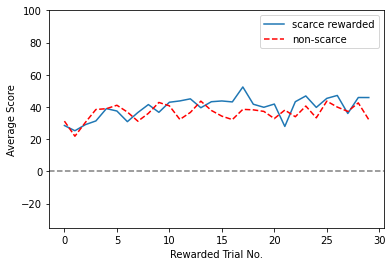

In [32]:
scarce = np.array(scarce_rewarded_scores)
non_scarce = np.array(non_scarce_rewarded_scores)
scarce_first_30 = np.array([scores[0:30] for scores in scarce_scores_all])

#plt.errorbar(range(scarce.shape[1]), scarce.mean(axis=0), yerr=scarce.std(axis=0), label='scarce rewarded')
#plt.errorbar(range(scarce_first_30.shape[1]), scarce_first_30.mean(axis=0), yerr=scarce_first_30.std(axis=0), label='scarce first 30')
#plt.errorbar(range(non_scarce.shape[1]), non_scarce.mean(axis=0), yerr=non_scarce.std(axis=0), color='r', linestyle='--', label='non-scarce')
plt.plot(range(scarce.shape[1]), scarce.mean(axis=0), label='scarce rewarded')
#plt.plot(range(scarce_first_30.shape[1]), scarce_first_30.mean(axis=0), label='scarce first 30')
plt.plot(range(non_scarce.shape[1]), non_scarce.mean(axis=0), color='r', linestyle='--', label='non-scarce')


plt.legend()
plt.axhline(0, linestyle = '--', color='k', alpha = 0.5)
plt.ylim([-35,100])
plt.xlabel("Rewarded Trial No.")
plt.ylabel("Average Score")
plt.show()

In [23]:
# CSV

import csv
import sys
import json

csv.field_size_limit(sys.maxsize)

part_dicts = []

with open('../results/pilot_2.0_results.csv', newline='') as f:
    csv_file = csv.reader(f)
    for idx, row in enumerate(csv_file):
        if idx != 0:
            part_dicts.append(json.loads(row[-1]))

for part in part_dicts:
    if part['workerId'].startswith("5eb40f1f0d916d20d9db9144"):
        print(len(part['data']))
        print(part['data'][-1])

666
{'uniqueid': '5eb40f1f0d916d20d9db9144:62ffb73fe31bae241538cb8a', 'current_trial': 665, 'dateTime': 1660931339681, 'trialdata': {'rt': 748, 'stimulus': "<p id='stroop-text' class='stroop-yellow'>YELLOW</p>", 'response': 'y', 'stimulus-type': 'congruent', 'word': 'yellow', 'color': 'yellow', 'correct_response': 'y', 'trial_id': 'stroop-congruent-19', 'trial_type': 'html-keyboard-response', 'trial_index': 665, 'time_elapsed': 2394224, 'internal_node_id': '0.0-16.0-8.0-68.0'}}
